In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output

In [2]:
!pip install scikit-learn==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 39.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.0.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve

In [4]:
import datetime
import json
import os
import pickle
import time

import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import (
    Activation,
    AveragePooling2D,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
    Rescaling,
)
from keras.models import Sequential
from keras.preprocessing import image
from PIL import Image, ImageFont
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Disable tenforflow information messages about GPU
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [5]:
sample_size = 3000
width = 15
height = 15

In [6]:
import os
os.chdir('./')

In [7]:
!unzip /content/casting_data.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/casting_data/train/def_front/cast_def_0_526.jpeg  
  inflating: /content/casting_data/train/def_front/cast_def_0_5260.jpeg  
  inflating: /content/casting_data/train/def_front/cast_def_0_5262.jpeg  
  inflating: /content/casting_data/train/def_front/cast_def_0_5265.jpeg  
  inflating: /content/casting_data/train/def_front/cast_def_0_527.jpeg  
  inflating: /content/casting_data/train/def_front/cast_def_0_5270.jpeg  
  inflating: /content/casting_data/train/def_front/cast_def_0_5272.jpeg  
  inflating: /content/casting_data/train/def_front/cast_def_0_5274.jpeg  
  inflating: /content/casting_data/train/def_front/cast_def_0_528.jpeg  
  inflating: /content/casting_data/train/def_front/cast_def_0_5282.jpeg  
  inflating: /content/casting_data/train/def_front/cast_def_0_5283.jpeg  
  inflating: /content/casting_data/train/def_front/cast_def_0_5284.jpeg  
  inflating: /content/casting_data/train/def_front/cast_def_0_52

In [8]:
import tensorflow as tf

In [9]:
dir_aug_data = "/content/casting_data/train"

original_train_data1 = tf.keras.utils.image_dataset_from_directory(
    directory=dir_aug_data,
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.25,
    subset="training",
    seed=123,
)

original_test_data1 = tf.keras.utils.image_dataset_from_directory(
    directory="/content/casting_data/test",
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.25,
    subset="validation",
    seed=123,
)

Found 6633 files belonging to 2 classes.
Using 4975 files for training.
Found 715 files belonging to 2 classes.
Using 178 files for validation.


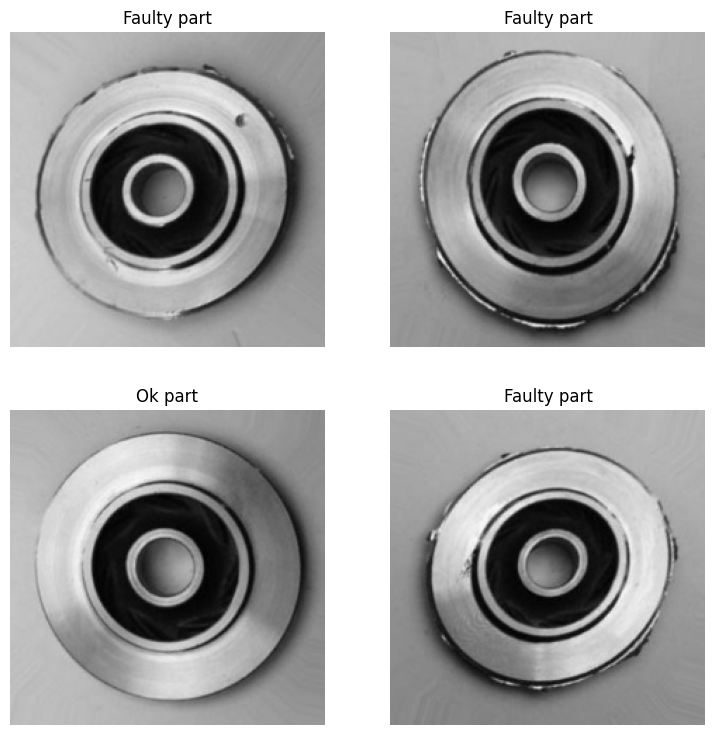

In [ ]:
image, label = next(iter(original_train_data1))

plt.figure(figsize=(9, 9))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(image[i].numpy().astype(np.uint8))
    plt.title(
        "Faulty part"
        if label[i].numpy().astype(np.uint8) == 0
        else "Ok part"
    )
    plt.axis("off")

In [ ]:
original_train_data1

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_augmentation = Sequential(
    [
        keras.layers.RandomFlip("horizontal_and_vertical"),
        keras.layers.RandomRotation((0, 0.9), fill_mode="constant"),
        keras.layers.RandomZoom(0.05, fill_mode="constant"),
        keras.layers.RandomContrast(0.25),
        keras.layers.RandomBrightness(0.25),
    ]
)

In [ ]:
def save_augmented_images(data, data_type, path_images):

    count_ok = 1
    count_def = 1
    for batch in data:
        (images, labels) = batch

        for i in range(images.shape[0]):
            if labels[i].numpy() == 0:
                for j in range(6):
                    augmented_image = data_augmentation(images[i], training=True)
                    img = Image.fromarray(augmented_image.numpy().astype(np.uint8))
                    img.save(
                        os.path.join(
                            path_images
                            + "/"
                            + data_type
                            + "/def_front/"
                            + str(count_def)
                            + ".jpeg"
                        )
                    )
                    count_def += 1

            else:
                for j in range(6):
                    augmented_image = data_augmentation(images[i], training=True)
                    img = Image.fromarray(augmented_image.numpy().astype(np.uint8))
                    img.save(
                        os.path.join(
                            path_images
                            + "/"
                            + data_type
                            + "/ok_front/"
                            + str(count_ok)
                            + ".jpeg"
                        )
                    )
                    count_ok += 1

In [ ]:
path_images='/content/casting_data'
save_augmented_images(original_train_data1, "train", path_images)
save_augmented_images(original_test_data1, "test", path_images)

hypothesis:we will make 2 dataset with and without data augumentation to see the result...

In [ ]:
dir_aug_data = "/content/casting_data/train"

original_train_data = tf.keras.utils.image_dataset_from_directory(
    directory=dir_aug_data,
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.25,
    subset="training",
    seed=123,
)

original_test_data = tf.keras.utils.image_dataset_from_directory(
    directory="/content/casting_data/test",
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.25,
    subset="validation",
    seed=123,
)

Found 36483 files belonging to 2 classes.
Using 27363 files for training.
Found 1783 files belonging to 2 classes.
Using 445 files for validation.


In [ ]:
scaling_layer = Rescaling(1.0 / 255)

train_data_scaled = original_test_data.map(lambda x, y: (scaling_layer(x), y))
test_data_scaled = original_train_data.map(lambda x, y: (scaling_layer(x), y))

image_batch, labels_batch = next(iter(train_data_scaled))

image = image_batch[0]
print(np.min(image), np.max(image))

0.08235294 1.0


In [ ]:
scaling_layer = Rescaling(1.0 / 255)

train_data_scaled1 = original_test_data1.map(lambda x, y: (scaling_layer(x), y))
test_data_scaled1 = original_train_data1.map(lambda x, y: (scaling_layer(x), y))


In [ ]:
import numpy as np
import tensorflow as tf
from keras import layers, models
import xgboost as xgb

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

feature_extractor = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D()
])

train_features = []
train_labels = []
for images, labels in train_data_scaled:
    features = feature_extractor(images)
    train_features.append(features.numpy())
    train_labels.append(labels.numpy())

train_features = np.concatenate(train_features, axis=0)
train_labels = np.concatenate(train_labels, axis=0)

test_features = []
test_labels = []
for images, labels in test_data_scaled:
    features = feature_extractor(images)
    test_features.append(features.numpy())
    test_labels.append(labels.numpy())

test_features = np.concatenate(test_features, axis=0)
test_labels = np.concatenate(test_labels, axis=0)



In [ ]:
import numpy as np
import tensorflow as tf
from keras import layers, models
import xgboost as xgb

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

feature_extractor = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D()
])

train_features1 = []
train_labels1 = []
for images, labels in train_data_scaled1:
    features = feature_extractor(images)
    train_features1.append(features.numpy())
    train_labels1.append(labels.numpy())

train_features1 = np.concatenate(train_features1, axis=0)
train_labels1 = np.concatenate(train_labels1, axis=0)

test_features1 = []
test_labels1 = []
for images, labels in test_data_scaled1:
    features = feature_extractor(images)
    test_features1.append(features.numpy())
    test_labels1.append(labels.numpy())

test_features1 = np.concatenate(test_features1, axis=0)
test_labels1 = np.concatenate(test_labels1, axis=0)



In [47]:
x_train = []
y_train = []
for images, labels in original_train_data1:
    x_train.append(images)
    y_train.append(labels)

x_train = tf.concat(x_train, axis=0)
y_train = tf.concat(y_train, axis=0)

model using xg boost with both dataset with and without data augumentation


In [ ]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(train_features, train_labels)

accuracy = xgb_classifier.score(test_features, test_labels)
print("Accuracy:", accuracy)

Accuracy: 0.886196688959544


In [ ]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(train_features1, train_labels1)

accuracy = xgb_classifier.score(test_features1, test_labels1)
print("Accuracy:", accuracy)

Accuracy: 0.9206030150753769


model using logistic regression with both dataset with and without data augumentation

Acc: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


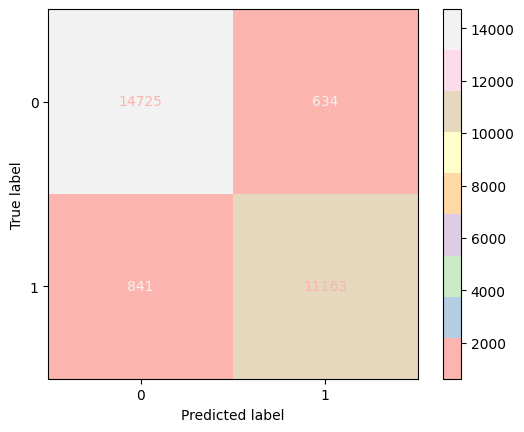

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


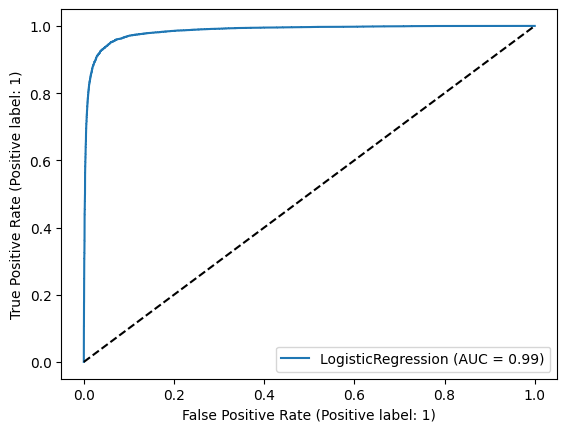

In [ ]:
model = LogisticRegression(max_iter=300)
model.fit(train_features, train_labels)

y_pred = model.predict(test_features)

print("Acc:",round(accuracy_score(test_labels,y_pred),2))

plot_confusion_matrix(model,test_features, test_labels, cmap='Pastel1')
plt.show()

plot_roc_curve(model,test_features, test_labels)
plt.plot([0,1],[0,1],'k--')
plt.show()

Acc: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


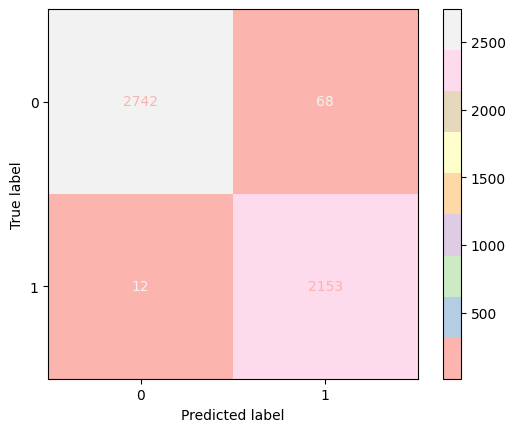

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


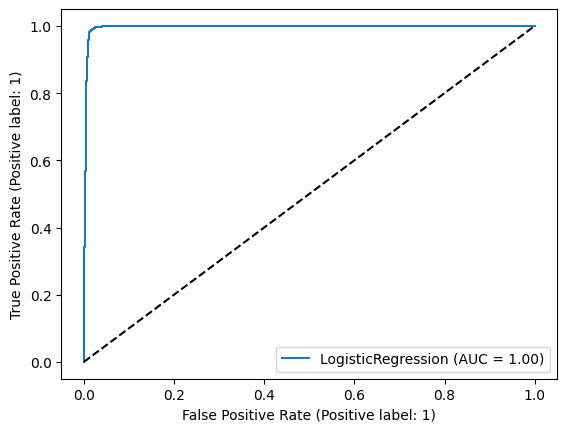

In [ ]:
model = LogisticRegression(max_iter=300)
model.fit(train_features1, train_labels1)

y_pred = model.predict(test_features1)

print("Acc:",round(accuracy_score(test_labels1,y_pred),2))

plot_confusion_matrix(model,test_features1, test_labels1, cmap='Pastel1')
plt.show()

plot_roc_curve(model,test_features1, test_labels1)
plt.plot([0,1],[0,1],'k--')
plt.show()

model using gaussian  with both dataset with and without data augumentation

Acc: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


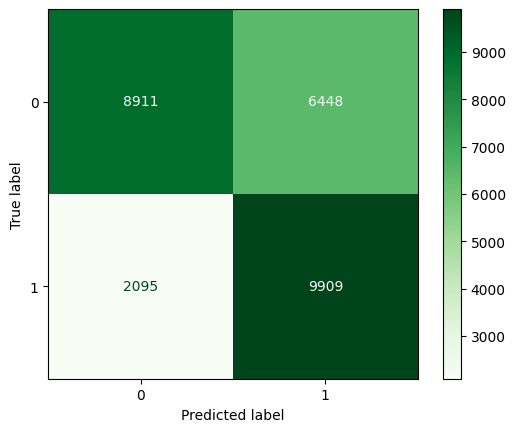

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


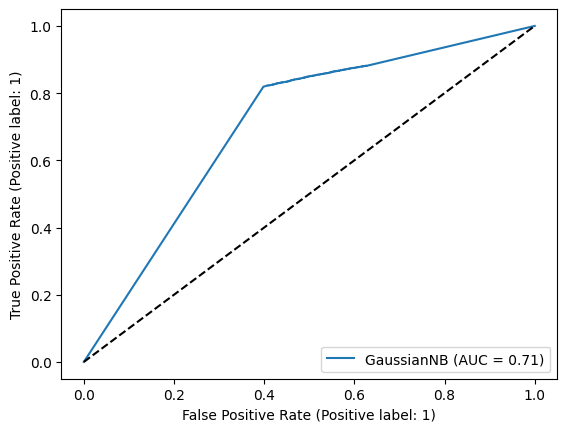

In [ ]:
model = GaussianNB()
model.fit(train_features, train_labels)

y_pred = model.predict(test_features)

print("Acc:",round(accuracy_score(test_labels,y_pred),2))

plot_confusion_matrix(model,test_features, test_labels, cmap='Greens')
plt.show()

plot_roc_curve(model,test_features, test_labels)
plt.plot([0,1],[0,1],'k--')
plt.show()

Acc: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


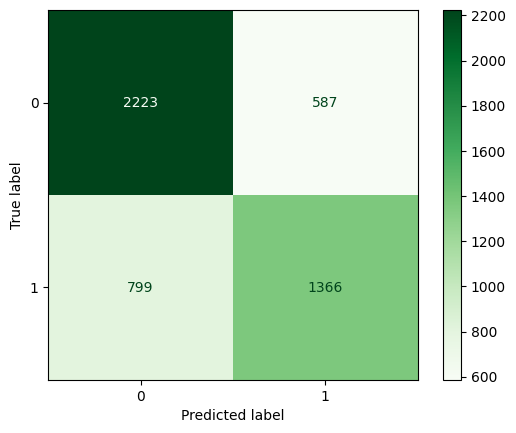

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


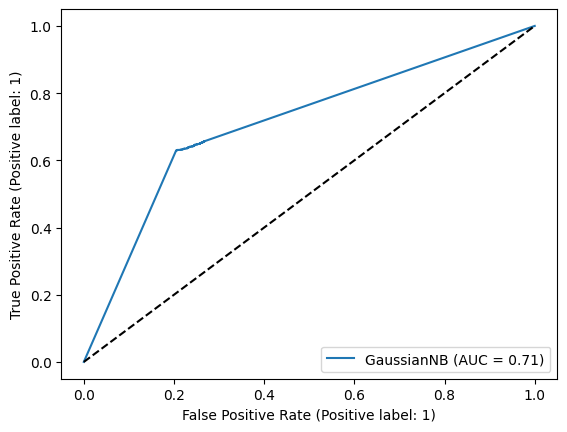

In [ ]:
model = GaussianNB()
model.fit(train_features1, train_labels1)

y_pred = model.predict(test_features1)

print("Acc:",round(accuracy_score(test_labels1,y_pred),2))

plot_confusion_matrix(model,test_features1, test_labels1, cmap='Greens')
plt.show()

plot_roc_curve(model,test_features1, test_labels1)
plt.plot([0,1],[0,1],'k--')
plt.show()

using decision tree

Acc: 0.73


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


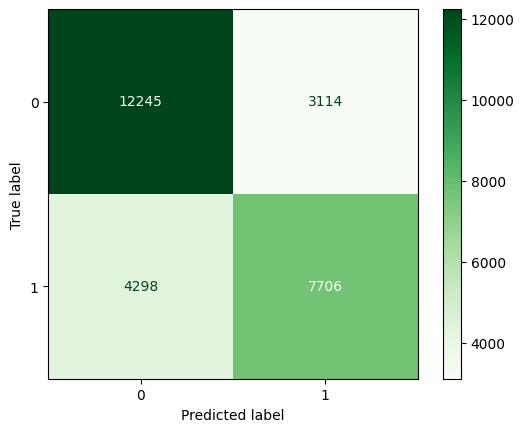

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


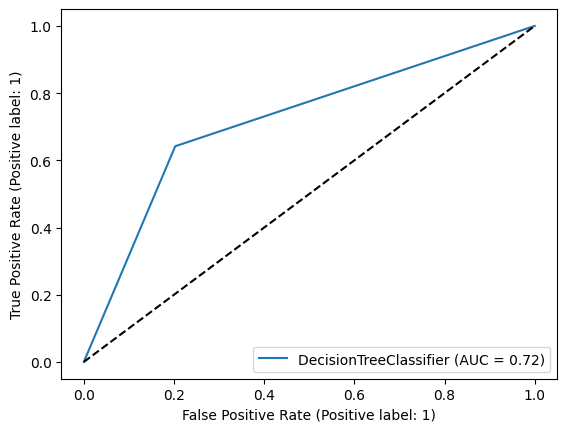

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_features, train_labels)

y_pred = model.predict(test_features)

print("Acc:",round(accuracy_score(test_labels,y_pred),2))

plot_confusion_matrix(model,test_features, test_labels, cmap='Greens')
plt.show()

plot_roc_curve(model,test_features, test_labels)
plt.plot([0,1],[0,1],'k--')
plt.show()

Acc: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


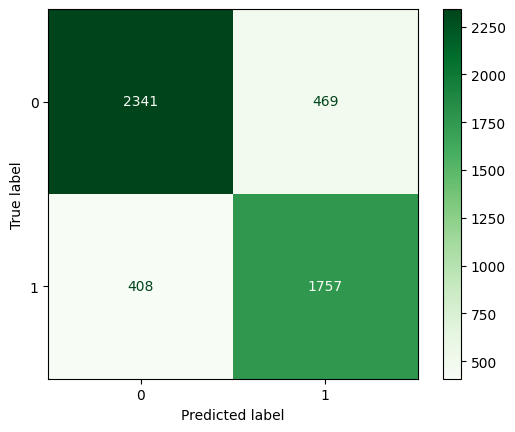

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


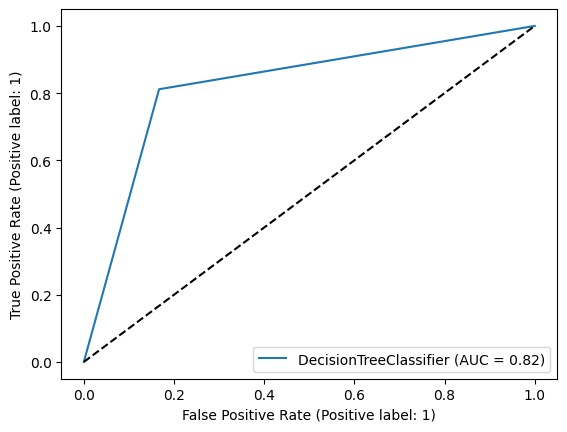

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_features1, train_labels1)

y_pred = model.predict(test_features1)

print("Acc:",round(accuracy_score(test_labels1,y_pred),2))

plot_confusion_matrix(model,test_features1, test_labels1, cmap='Greens')
plt.show()

plot_roc_curve(model,test_features1, test_labels1)
plt.plot([0,1],[0,1],'k--')
plt.show()

using kneighbour

Acc: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


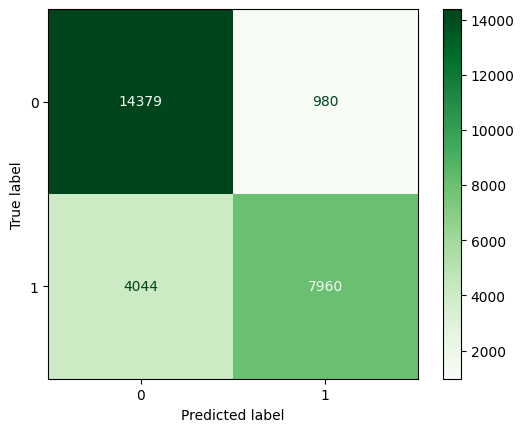

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


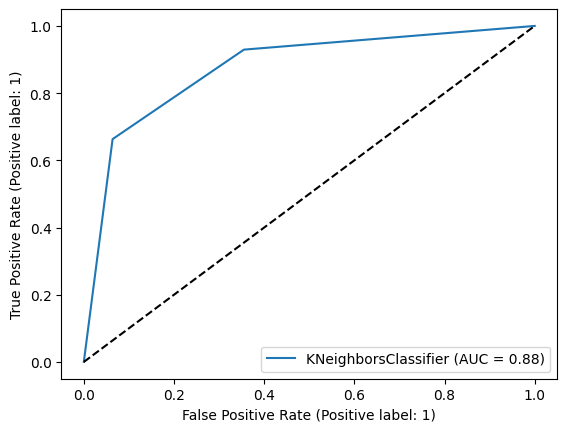

In [ ]:
model = KNeighborsClassifier(2)
model.fit(train_features, train_labels)

y_pred = model.predict(test_features)

print("Acc:",round(accuracy_score(test_labels,y_pred),2))

plot_confusion_matrix(model,test_features, test_labels, cmap='Greens')
plt.show()

plot_roc_curve(model,test_features, test_labels)
plt.plot([0,1],[0,1],'k--')
plt.show()

Acc: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


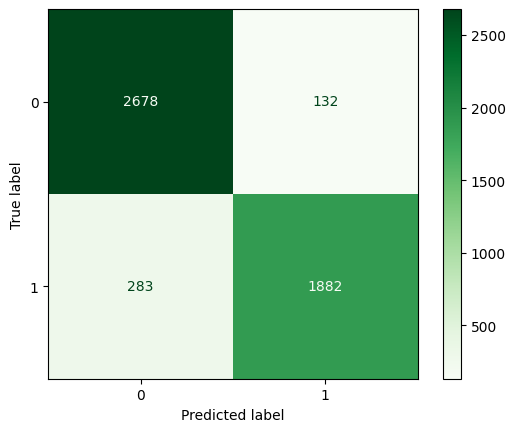

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


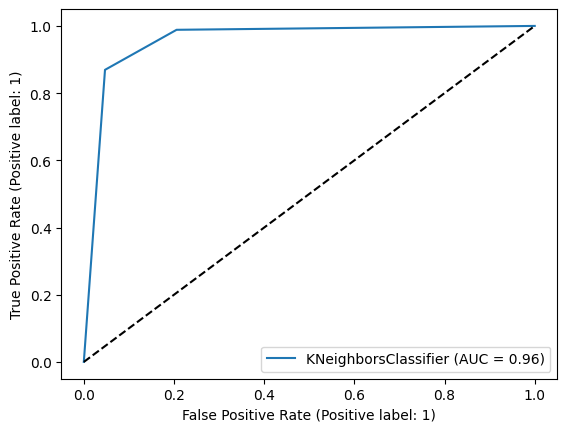

In [ ]:
model = KNeighborsClassifier(2)
model.fit(train_features1, train_labels1)

y_pred = model.predict(test_features1)

print("Acc:",round(accuracy_score(test_labels1,y_pred),2))

plot_confusion_matrix(model,test_features1, test_labels1, cmap='Greens')
plt.show()

plot_roc_curve(model,test_features1, test_labels1)
plt.plot([0,1],[0,1],'k--')
plt.show()

using SVC

Acc: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


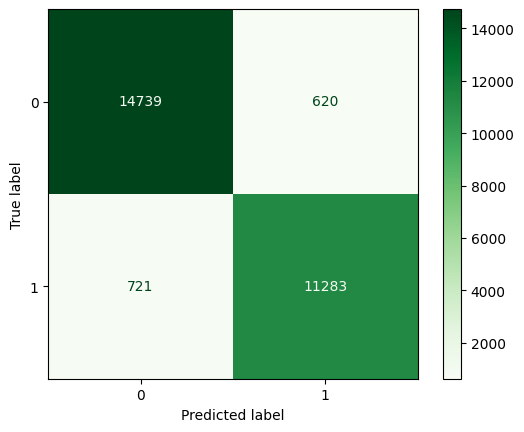

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


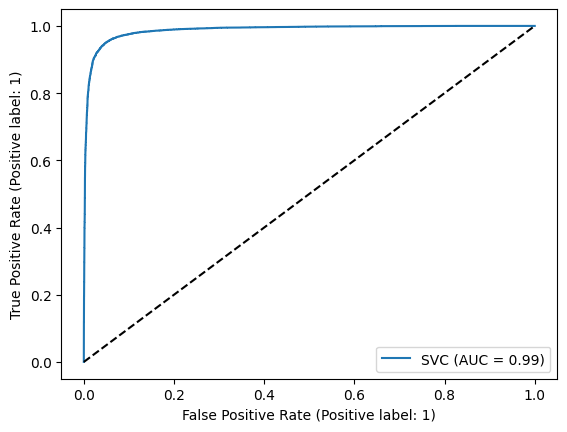

In [ ]:
model = SVC()
model.C = 100
model.fit(train_features, train_labels)

y_pred = model.predict(test_features)

print("Acc:",round(accuracy_score(test_labels,y_pred),2))

plot_confusion_matrix(model,test_features, test_labels, cmap='Greens')
plt.show()

plot_roc_curve(model,test_features, test_labels)
plt.plot([0,1],[0,1],'k--')
plt.show()

Acc: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


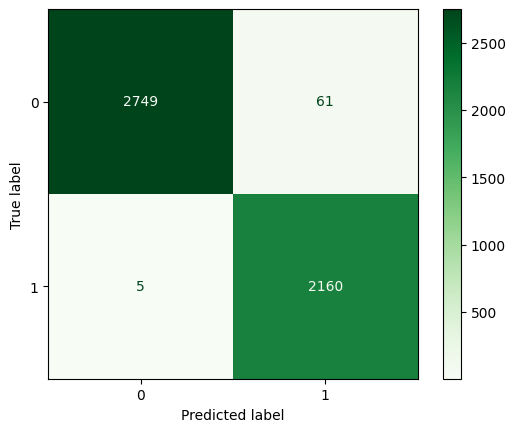

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


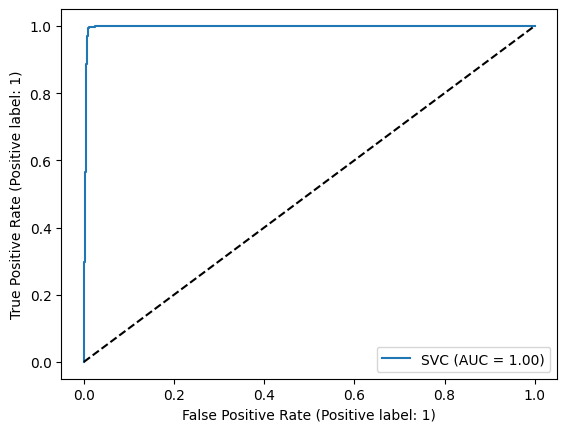

In [ ]:
model = SVC()
model.C = 100
model.fit(train_features1, train_labels1)

y_pred = model.predict(test_features1)

print("Acc:",round(accuracy_score(test_labels1,y_pred),2))

plot_confusion_matrix(model,test_features1, test_labels1, cmap='Greens')
plt.show()

plot_roc_curve(model,test_features1, test_labels1)
plt.plot([0,1],[0,1],'k--')
plt.show()

using gradient boosting

In [ ]:
param_grid = {
    "n_estimators": [225, 300],
    "subsample": [1.0, 0.5],
    "max_features": [20, 30],
}

gb_model = GridSearchCV(
    GradientBoostingClassifier(random_state=43, learning_rate=0.1),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring="accuracy",
)

gb_model.fit(train_features, train_labels)

gb_predict = gb_model.predict(test_features)
gb_accuracy = accuracy_score(test_labels, gb_predict)

print("Accuracy of Gradient Boosting Trees model: %.3f" % gb_accuracy)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Accuracy of Gradient Boosting Trees model: 0.912


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


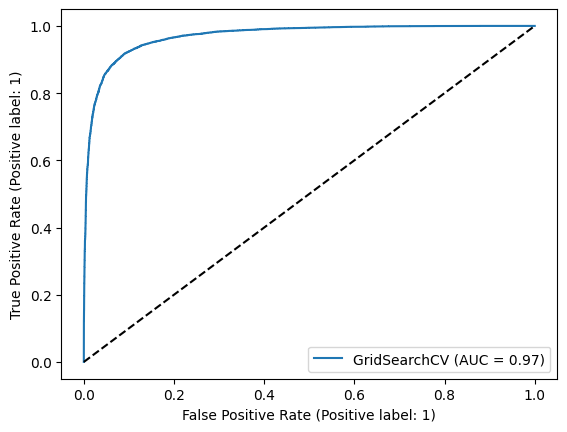

In [ ]:
plot_roc_curve(gb_model,test_features, test_labels)
plt.plot([0,1],[0,1],'k--')
plt.show()

In [ ]:
param_grid = {
    "n_estimators": [225, 300],
    "subsample": [1.0, 0.5],
    "max_features": [20, 30],
}

gb_model = GridSearchCV(
    GradientBoostingClassifier(random_state=43, learning_rate=0.1),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring="accuracy",
)

gb_model.fit(train_features1, train_labels1)

gb_predict = gb_model.predict(test_features1)
gb_accuracy = accuracy_score(test_labels1, gb_predict)

print("Accuracy of Gradient Boosting Trees model: %.3f" % gb_accuracy)

Accuracy of Gradient Boosting Trees model: 0.958


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


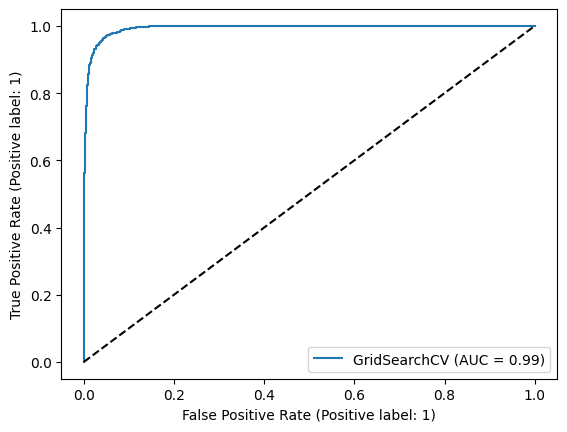

In [ ]:
plot_roc_curve(gb_model,test_features1, test_labels1)
plt.plot([0,1],[0,1],'k--')
plt.show()

we can make a very complex model too with grid search cv and voting ensembler but let jump to deep learning

using a custom cnn

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

simple_model = Sequential()
simple_model.add(Conv2D(32, (5, 5), strides=(2, 2), input_shape=(224,224,3), activation="relu"))
simple_model.add(AveragePooling2D((2, 2), strides=(2, 2)))
simple_model.add(Conv2D(64, (5, 5), strides=(2, 2), activation="relu"))
simple_model.add(AveragePooling2D((2, 2), strides=(2, 2)))
simple_model.add(Flatten())
simple_model.add(Dense(64, activation="relu"))
simple_model.add(Dense(32, activation="relu"))
simple_model.add(Dense(1, activation="sigmoid"))

simple_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = simple_model.fit(train_data_scaled, epochs=60, validation_data=test_data_scaled)

test_loss, test_accuracy = simple_model.evaluate(test_data_scaled)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/60
14/14 [==============================] - 31s 2s/step - loss: 0.6680 - accuracy: 0.6247 - val_loss: 0.6886 - val_accuracy: 0.5858
Epoch 2/60
14/14 [==============================] - 21s 2s/step - loss: 0.6611 - accuracy: 0.6404 - val_loss: 0.7518 - val_accuracy: 0.5613
Epoch 3/60
14/14 [==============================] - 20s 1s/step - loss: 0.6764 - accuracy: 0.6292 - val_loss: 0.6843 - val_accuracy: 0.5613
Epoch 4/60
14/14 [==============================] - 18s 1s/step - loss: 0.6578 - accuracy: 0.6045 - val_loss: 0.6819 - val_accuracy: 0.5446
Epoch 5/60
14/14 [==============================] - 21s 2s/step - loss: 0.6558 - accuracy: 0.6090 - val_loss: 0.6701 - val_accuracy: 0.5613
Epoch 6/60
14/14 [==============================] - 18s 1s/step - loss: 0.6322 - accuracy: 0.6360 - val_loss: 0.6318 - val_accuracy: 0.7142
Epoch 7/60
14/14 [==============================] - 19s 1s/step - loss: 0.5977 - accuracy: 0.6652 - val_loss: 0.6456 - val_accuracy: 0.5941
Epoch 8/60
14/14 [==

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

simple_model = Sequential()
simple_model.add(Conv2D(32, (5, 5), strides=(2, 2), input_shape=(224,224,3), activation="relu"))
simple_model.add(AveragePooling2D((2, 2), strides=(2, 2)))
simple_model.add(Conv2D(64, (5, 5), strides=(2, 2), activation="relu"))
simple_model.add(AveragePooling2D((2, 2), strides=(2, 2)))
simple_model.add(Flatten())
simple_model.add(Dense(64, activation="relu"))
simple_model.add(Dense(32, activation="relu"))
simple_model.add(Dense(1, activation="sigmoid"))

simple_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = simple_model.fit(train_data_scaled1, epochs=40, validation_data=test_data_scaled1)

test_loss, test_accuracy = simple_model.evaluate(test_data_scaled1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/40
6/6 [==============================] - 14s 2s/step - loss: 0.6726 - accuracy: 0.6348 - val_loss: 0.7512 - val_accuracy: 0.5648
Epoch 2/40
6/6 [==============================] - 5s 898ms/step - loss: 0.6758 - accuracy: 0.6348 - val_loss: 0.6834 - val_accuracy: 0.5648
Epoch 3/40
6/6 [==============================] - 11s 2s/step - loss: 0.6634 - accuracy: 0.6348 - val_loss: 0.7059 - val_accuracy: 0.5648
Epoch 4/40
6/6 [==============================] - 6s 1s/step - loss: 0.6565 - accuracy: 0.6348 - val_loss: 0.6911 - val_accuracy: 0.5648
Epoch 5/40
6/6 [==============================] - 5s 994ms/step - loss: 0.6507 - accuracy: 0.6348 - val_loss: 0.6771 - val_accuracy: 0.5648
Epoch 6/40
6/6 [==============================] - 6s 1s/step - loss: 0.6352 - accuracy: 0.6348 - val_loss: 0.7214 - val_accuracy: 0.5648
Epoch 7/40
6/6 [==============================] - 11s 2s/step - loss: 0.6288 - accuracy: 0.6348 - val_loss: 0.6555 - val_accuracy: 0.5660
Epoch 8/40
6/6 [================

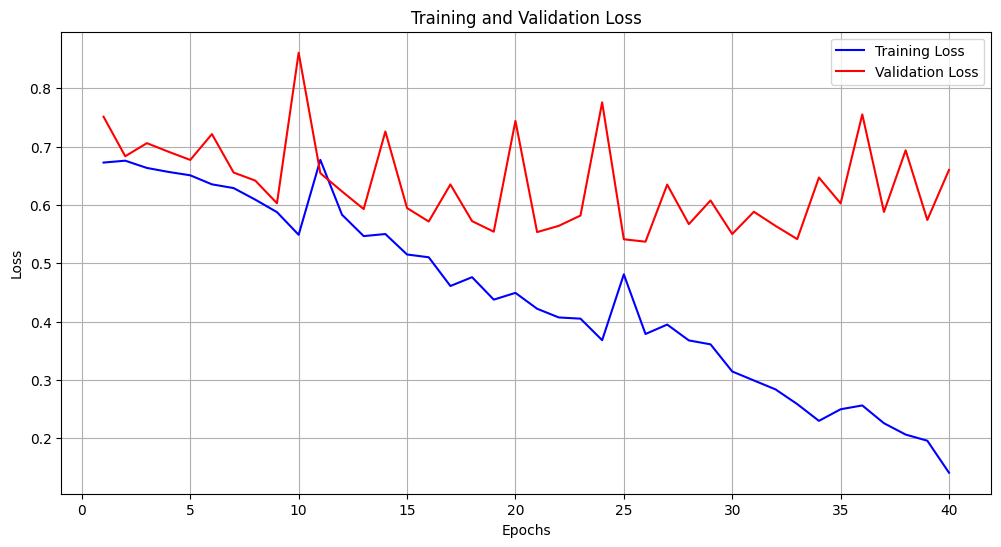

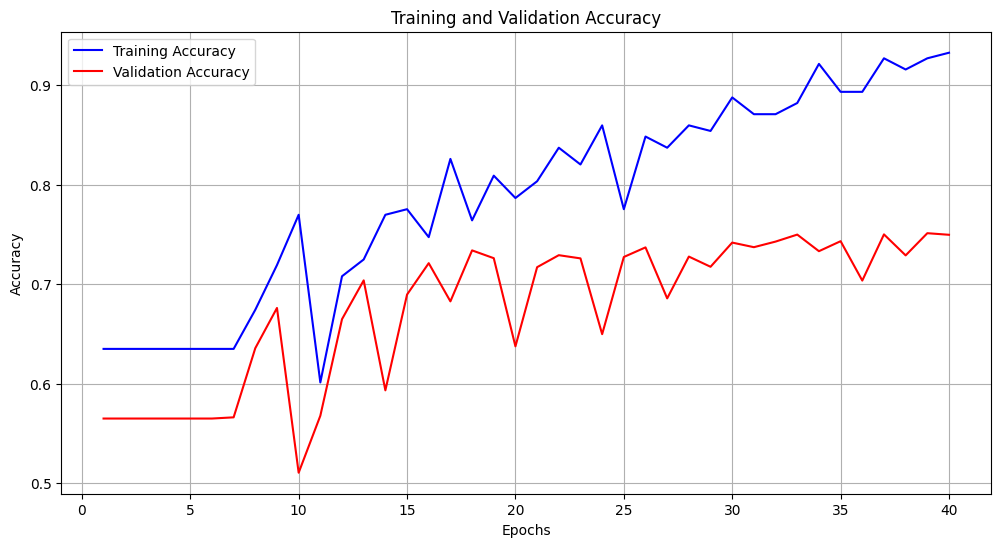

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


may if we run for more epoch then it may give better result but at presesnt it is giving worst result than machine learning model

using the concept of tensor flow

In [ ]:
vgg_model = Sequential()

vgg_model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation="relu"))
vgg_model.add(MaxPooling2D())

vgg_model.add(Conv2D(64, (3, 3), activation="relu"))
vgg_model.add(MaxPooling2D())

vgg_model.add(Conv2D(128, (3, 3), activation="relu"))
vgg_model.add(MaxPooling2D())

vgg_model.add(Conv2D(128, (3, 3), strides=(2, 2), activation="relu"))
vgg_model.add(MaxPooling2D())

vgg_model.add(Flatten())
vgg_model.add(Dense(128, activation="relu"))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(1, activation="sigmoid"))

vgg_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)     

In [ ]:
vgg_model.compile(
    optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"]
)

#vgg_model_time_callback = TimeHistory()


# t = datetime.datetime.now()
hist_vgg = vgg_model.fit(
    train_data_scaled,
    validation_data=test_data_scaled,
    epochs=45,
)

Epoch 1/45
14/14 [==============================] - 25s 2s/step - loss: 0.6683 - accuracy: 0.6292 - val_loss: 0.6851 - val_accuracy: 0.5613
Epoch 2/45
14/14 [==============================] - 19s 1s/step - loss: 0.6676 - accuracy: 0.6292 - val_loss: 0.6969 - val_accuracy: 0.5613
Epoch 3/45
14/14 [==============================] - 21s 2s/step - loss: 0.6628 - accuracy: 0.6292 - val_loss: 0.6846 - val_accuracy: 0.5613
Epoch 4/45
14/14 [==============================] - 22s 2s/step - loss: 0.6419 - accuracy: 0.6404 - val_loss: 0.6698 - val_accuracy: 0.6584
Epoch 5/45
14/14 [==============================] - 42s 3s/step - loss: 0.6072 - accuracy: 0.6719 - val_loss: 0.6403 - val_accuracy: 0.6787
Epoch 6/45
14/14 [==============================] - 24s 2s/step - loss: 0.5824 - accuracy: 0.7169 - val_loss: 0.6296 - val_accuracy: 0.6739
Epoch 7/45
14/14 [==============================] - 42s 3s/step - loss: 0.5469 - accuracy: 0.7483 - val_loss: 0.6383 - val_accuracy: 0.6802
Epoch 8/45
14/14 [==

In [ ]:
test_loss, test_accuracy = simple_model.evaluate(test_data_scaled)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

856/856 [==============================] - 22s 25ms/step - loss: 0.9837 - accuracy: 0.6869
Test Loss: 0.9837339520454407
Test Accuracy: 0.686913013458252


In [ ]:
vgg_model = Sequential()

vgg_model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation="relu"))
vgg_model.add(MaxPooling2D())

vgg_model.add(Conv2D(64, (3, 3), activation="relu"))
vgg_model.add(MaxPooling2D())

vgg_model.add(Conv2D(128, (3, 3), activation="relu"))
vgg_model.add(MaxPooling2D())

vgg_model.add(Conv2D(128, (3, 3), strides=(2, 2), activation="relu"))
vgg_model.add(MaxPooling2D())

vgg_model.add(Flatten())
vgg_model.add(Dense(128, activation="relu"))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(1, activation="sigmoid"))

vgg_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)     

In [ ]:
vgg_model.compile(
    optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"]
)

#vgg_model_time_callback = TimeHistory()


# t = datetime.datetime.now()
hist_vgg = vgg_model.fit(
    train_data_scaled1,
    validation_data=test_data_scaled1,
    epochs=45,
)

Epoch 1/45
6/6 [==============================] - 7s 1s/step - loss: 0.1000 - accuracy: 0.9607 - val_loss: 1.0044 - val_accuracy: 0.7678
Epoch 2/45
6/6 [==============================] - 6s 1s/step - loss: 0.0479 - accuracy: 0.9888 - val_loss: 0.9277 - val_accuracy: 0.7580
Epoch 3/45
6/6 [==============================] - 5s 966ms/step - loss: 0.0315 - accuracy: 0.9944 - val_loss: 1.0289 - val_accuracy: 0.7600
Epoch 4/45
6/6 [==============================] - 6s 1s/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.2982 - val_accuracy: 0.7640
Epoch 5/45
6/6 [==============================] - 11s 2s/step - loss: 0.0165 - accuracy: 0.9888 - val_loss: 1.0635 - val_accuracy: 0.7646
Epoch 6/45
6/6 [==============================] - 6s 1s/step - loss: 0.0279 - accuracy: 0.9888 - val_loss: 1.3634 - val_accuracy: 0.7654
Epoch 7/45
6/6 [==============================] - 6s 1s/step - loss: 0.0138 - accuracy: 0.9944 - val_loss: 1.4257 - val_accuracy: 0.7664
Epoch 8/45
6/6 [=====================

In [ ]:
test_loss, test_accuracy = simple_model.evaluate(test_data_scaled1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

156/156 [==============================] - 6s 36ms/step - loss: 0.6600 - accuracy: 0.7495
Test Loss: 0.6600087285041809
Test Accuracy: 0.7495477199554443
156/156 [==============================] - 5s 30ms/step - loss: 0.6600 - accuracy: 0.7495
Test Loss: 0.6600090265274048
Test Accuracy: 0.7495477199554443


In [ ]:
vgg_better_model = Sequential()

vgg_better_model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation="relu"))
vgg_better_model.add(MaxPooling2D())

vgg_better_model.add(Conv2D(64, (3, 3), strides=(2, 2), activation="relu"))
vgg_better_model.add(MaxPooling2D())

vgg_better_model.add(Conv2D(128, (3, 3), strides=(2, 2), activation="relu"))
vgg_better_model.add(MaxPooling2D())

vgg_better_model.add(Flatten())
vgg_better_model.add(Dense(128, activation="relu"))
vgg_better_model.add(Dropout(0.5))
vgg_better_model.add(Dense(1, activation="sigmoid"))

vgg_better_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 55, 55, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 27, 27, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 128)       

In [ ]:
vgg_better_model.compile(
    optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"]
)

#vgg_model_time_callback = TimeHistory()


# t = datetime.datetime.now()
hist_vgg = vgg_better_model.fit(
    train_data_scaled1,
    validation_data=test_data_scaled1,
    epochs=35,
)

Epoch 1/35
6/6 [==============================] - 7s 1s/step - loss: 0.6630 - accuracy: 0.6236 - val_loss: 0.6936 - val_accuracy: 0.5648
Epoch 2/35
6/6 [==============================] - 5s 1s/step - loss: 0.6529 - accuracy: 0.6404 - val_loss: 0.6822 - val_accuracy: 0.5648
Epoch 3/35
6/6 [==============================] - 6s 1s/step - loss: 0.6722 - accuracy: 0.6292 - val_loss: 0.6860 - val_accuracy: 0.5648
Epoch 4/35
6/6 [==============================] - 6s 1s/step - loss: 0.6633 - accuracy: 0.5899 - val_loss: 0.6754 - val_accuracy: 0.5648
Epoch 5/35
6/6 [==============================] - 5s 934ms/step - loss: 0.6646 - accuracy: 0.6124 - val_loss: 0.6730 - val_accuracy: 0.5648
Epoch 6/35
6/6 [==============================] - 5s 1s/step - loss: 0.6299 - accuracy: 0.6404 - val_loss: 0.6709 - val_accuracy: 0.5648
Epoch 7/35
6/6 [==============================] - 6s 1s/step - loss: 0.6114 - accuracy: 0.6404 - val_loss: 0.6504 - val_accuracy: 0.5692
Epoch 8/35
6/6 [======================

In [ ]:
test_loss, test_accuracy = vgg_better_model.evaluate(test_data_scaled1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

156/156 [==============================] - 5s 32ms/step - loss: 1.0501 - accuracy: 0.7698
Test Loss: 1.0501327514648438
Test Accuracy: 0.7698492407798767


let check with xception net we wil also go for gradcamm to ssee the result

In [13]:
from tensorflow import keras
from tensorflow.keras import layers


In [14]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",input_shape=(224,224,3), seed = 81 ),
    layers.RandomZoom(0.1, seed = 81 ),
    layers.RandomContrast(0.3, seed = 81  )
  ]
)

In [15]:
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(224,224, 3),
    include_top=False)

83683744/83683744 [==============================] - 1s 0us/step


In [16]:
base_model.trainable = False

inputs = keras.Input(shape=(224,224, 3))

x = data_augmentation(inputs)

x = keras.layers.Rescaling(scale=1 / 255.0)(x)

x = base_model(x, training=False)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation = 'relu')(x)
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)
pretrained_model = keras.Model(inputs, outputs)

In [17]:
pretrained_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history2 = pretrained_model.fit(
    original_train_data1,
    validation_data=original_test_data1,
    epochs=35,
)

Epoch 1/35
156/156 [==============================] - 37s 164ms/step - loss: 0.6032 - accuracy: 0.9250 - val_loss: 0.2607 - val_accuracy: 0.9438
Epoch 2/35
156/156 [==============================] - 21s 135ms/step - loss: 0.4264 - accuracy: 0.9566 - val_loss: 0.0334 - val_accuracy: 0.9944
Epoch 3/35
156/156 [==============================] - 22s 137ms/step - loss: 0.2679 - accuracy: 0.9684 - val_loss: 0.0214 - val_accuracy: 0.9831
Epoch 4/35
156/156 [==============================] - 22s 140ms/step - loss: 0.2146 - accuracy: 0.9771 - val_loss: 0.0302 - val_accuracy: 0.9944
Epoch 5/35
156/156 [==============================] - 22s 137ms/step - loss: 0.1041 - accuracy: 0.9871 - val_loss: 0.0106 - val_accuracy: 0.9944
Epoch 6/35
156/156 [==============================] - 22s 138ms/step - loss: 0.1338 - accuracy: 0.9841 - val_loss: 0.2439 - val_accuracy: 0.9775
Epoch 7/35
156/156 [==============================] - 22s 139ms/step - loss: 0.1174 - accuracy: 0.9827 - val_loss: 0.0069 - val_ac

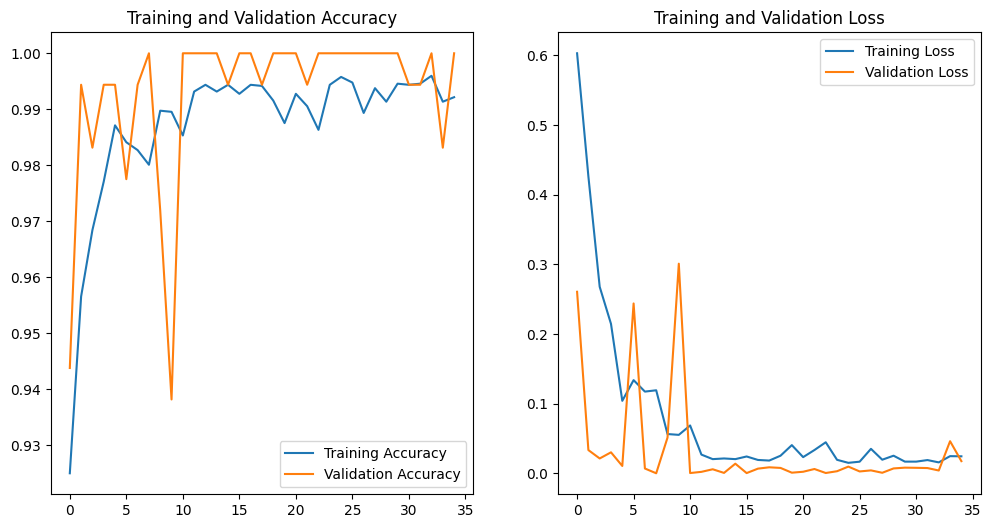

In [19]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# we GOT AN   quite satisfactory..we can do some more fine tunning for better result
# but at these stage i avoided to do that

In [ ]:
# we can also use voting ensembler and other stuff for better result

WE can also put gradcam to see the sresult i disintdone that due to lack of resorces ..